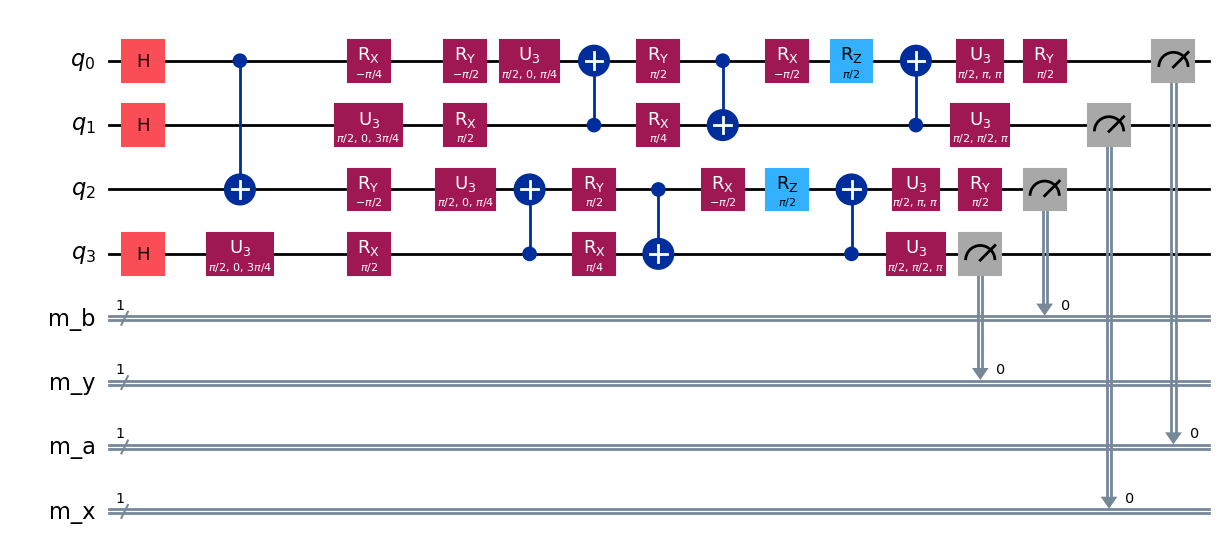

In [6]:
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend1 = GenericBackendV2(num_qubits=4,coupling_map=[[0, 1], [0, 2], [1, 0], [1, 3], [2, 0], [2, 3], [3, 1], [3, 2]])
new_bell=QuantumCircuit.from_qasm_file('bell_n4.qasm')

#new_bell=new_bell1.decompose()
new_bell.draw(output='mpl')

In [34]:
new_bell.depth()

14

In [35]:
new_bell.count_ops()

OrderedDict([('u3', 8),
             ('cx', 7),
             ('rx', 7),
             ('ry', 6),
             ('measure', 4),
             ('h', 3),
             ('rz', 2)])

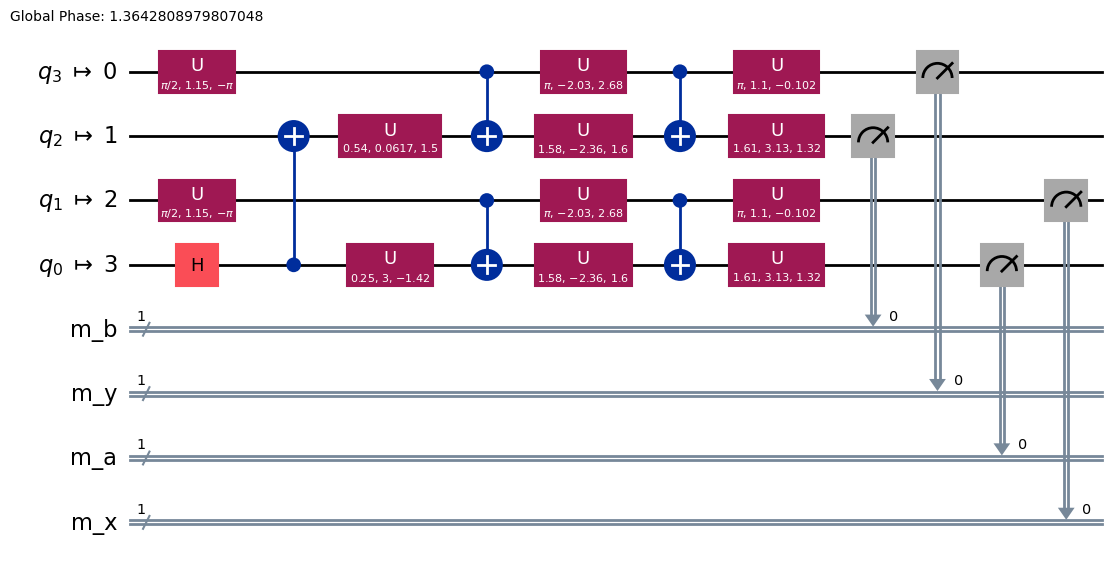

In [36]:
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import GenericBackendV2
 

trans_qiskit1 = transpile(new_bell, backend=backend1, optimization_level=3, basis_gates=['u','cx','ry','rx','h','s','rz'])
#trans_qiskit=trans_qiskit1.decompose()
trans_qiskit1.draw("mpl")

In [37]:
trans_qiskit1.depth()

8

In [18]:
trans_qiskit1.count_ops()

OrderedDict([('u', 12), ('cx', 5), ('measure', 4), ('h', 1)])

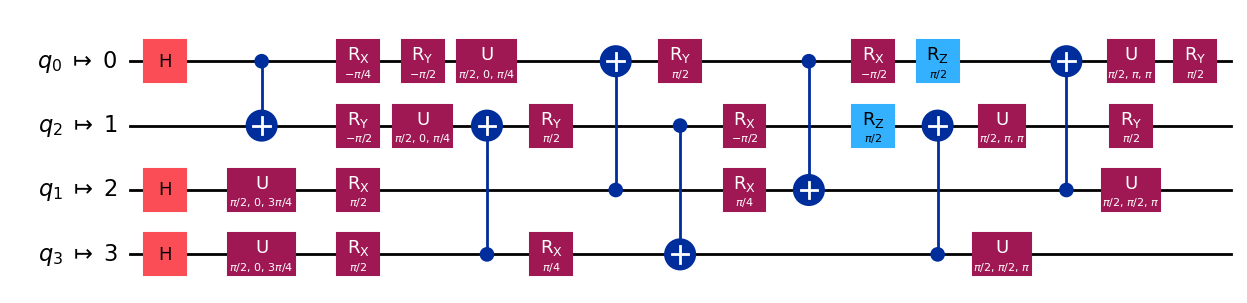

In [38]:
from mqt import qmap

arch = qmap.Architecture(
    4,
    {
        (0, 1),
        (0, 2),
        (1, 0),
        (1, 3),
        (2, 0),
        (2, 3),
        (3, 1),
        (3, 2),
    },
)

a_algo1, res = qmap.compile(new_bell, arch, method="heuristic", post_mapping_optimizations=True, add_measurements_to_mapped_circuit=False)
#a_algo1 = transpile(a_algo, backend1, basis_gates=['rz', 'sx', 'cx'])

#a_algo.decompose().draw(output='mpl')
#a_algo=a_algo1.decompose()
a_algo1.draw(output="mpl")

In [39]:
a_algo1.depth()

13

In [21]:
a_algo1.count_ops()

OrderedDict([('u', 8),
             ('cx', 7),
             ('rx', 7),
             ('ry', 6),
             ('measure', 4),
             ('h', 3),
             ('rz', 2),
             ('barrier', 1)])

In [40]:
print (" Additional SWAPs : %d" % res . output . swaps )
print (" Runtime : %f" % res . time )

 Additional SWAPs : 0
 Runtime : 0.000090
